<a href="https://colab.research.google.com/github/ChangED1122/Python/blob/Python-Keras/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential #引入Sequential函式
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential,layers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from tensorflow import keras

In [ ]:
data=read_csv("/content/金融機構發行金融卡及裝設ATM 統計_.csv")
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m')
df = pd.read_csv(r'/content/金融機構發行金融卡及裝設ATM 統計_.csv',parse_dates=['年月'], date_parser=dateparse)
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
count = df[['ATM裝設台數']]
scaler = MinMaxScaler(feature_range=(-1, 1))
count['ATM裝設台數'] = scaler.fit_transform(count['ATM裝設台數'].values.reshape(-1,1))
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

<ipython-input-72-1825d4f61db1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count['ATM裝設台數'] = scaler.fit_transform(count['ATM裝設台數'].values.reshape(-1,1))


In [ ]:
def prepare_data(data,time_span=12):
    x,y = [],[]
    for i in range(data.shape[0]-time_span):
        x.append(list(data[i:i+time_span]))
        y.append(data[i+time_span])
    return np.array(x),np.array(y)

In [ ]:
x,y = prepare_data(np.array(df['ATM裝設台數'].dropna()))
split_index = int(x.shape[0] * 0.8)
xtrain , xtest, ytrain, ytest = x[:split_index], x[split_index:], y[:split_index], y[split_index:]
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((151, 12), (38, 12), (151,), (38,))

In [ ]:
ann = Sequential(
                    [
                        layers.Dense(512,activation='relu',input_shape=(12,)),
                        layers.Dense(1028,activation='relu'),
                        layers.Dense(1,activation='relu')
                    ]
                )

ann.summary()
ann.compile(loss='mean_squared_error',optimizer='adam')
training = ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

In [ ]:
ann.predict(xtest)

In [ ]:
ytest

array([30080, 30197, 30306, 30440, 30495, 30580, 30615, 30691, 30718,
       30758, 30806, 30874, 30924, 31020, 31081, 31145, 31216, 31335,
       31381, 31451, 31523, 31597, 31701, 31802, 31866, 31937, 32007,
       32091, 32150, 32292, 32294, 32335, 32327, 32388, 32424, 32464,
       32484, 32543])

In [ ]:
ypred = ann.predict(xtest).reshape(ytest.shape[0],)
px.line({'original data':ytest,'Pred':ypred})

2/2 [==============================] - 0s 12ms/step


In [ ]:
X = df.drop(["ATM裝設台數"], axis=1)
X = X.drop(["年月"], axis=1)
y = df[["ATM裝設台數"]]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train

In [ ]:
#Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = "adam", loss = keras.losses.mean_squared_error, metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

In [ ]:
 model.predict(X_test)

In [ ]:
y_test

,ATM裝設台數
95,26841
15,25323
30,25583
158,29786
128,27033
115,27228
69,25735
171,30718
175,30924
45,25407


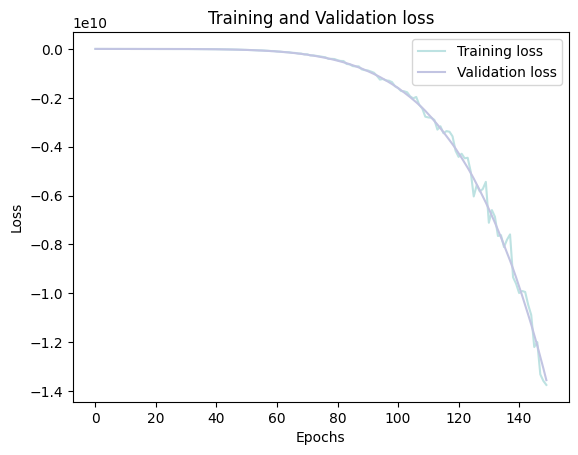

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()